Liczba pkt nad krzywa f(x): 275
Liczba pkt pod krzywa f(x): 325
N. pod f(x) /N.total: 0.5416666666666666
Powierzchnia calkowita: -710.0
Powierzchnia pod krzywa f(x): -384.5833333333333


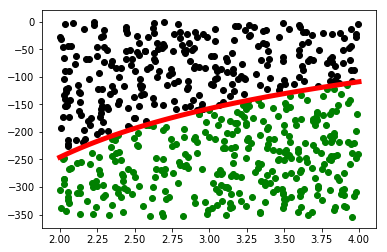

In [5]:
#Metoda Monte Carlo

import numpy as np
import matplotlib.pyplot as plt
def MonteC(f, x0, x1, N):
    'Oblicza calke funkcji f(x)dx od x0 do x1 dla N pnktow'    
    
    np.random.seed(1)
    #x nalezy do przedzialu [x0,x1) z krokiem 0.01
    x = np.arange(x0, x1, 0.01)
    x = np.linspace(x0, x1, 100)
    y = f(x)
    #szuka max f(x) na przedziale [x0,x1)
    f_max = np.max(y)
    f_min = np.min(y)
    
    #x_rand nalezy do przedialu [x1,x0)
    #y_rand nalezy do przedzialu (0,fmax)
    
    #x_rand = x0 + np.random.random(N)*(x1-x0)
    #y_rand =  0 + np.random.random(N)*f_max
    
    x_rand = x0 + np.random.random(N)*(x1-x0)
    y_rand = np.random.random(N) * (f_max + f_min)
    
    #szukamy punktow pod i na krzywa f(x)
    #maskowanie punktow
    mask_below = np.where(y_rand < f(x_rand))
    mask_above = np.where(y_rand >= f(x_rand))
   
    
    #wyswietlamy wyniki
    plt.plot(x, y, color = 'red', lw = 5)
    pkt_below = plt.scatter(x_rand[mask_below], y_rand[mask_below], color = 'green')
    pkt_above = plt.scatter(x_rand[mask_above], y_rand[mask_above], color = 'black')
    
    
    print('Liczba pkt nad krzywa f(x):', len(mask_above[0]))
    print('Liczba pkt pod krzywa f(x):', len(mask_below[0]))
    print('N. pod f(x) /N.total:', len(mask_below[0])/N)
    print('Powierzchnia calkowita:', (f_max+f_min)*(x1-x0))
    print('Powierzchnia pod krzywa f(x):',(f_max+f_min)*(x1-x0)*len(mask_below[0])/N)


def f1(x):
    return -2*x**4 + 5*x

#MonteC(f1,0,0.5,600)
    
def f2(x):
    return 1/(np.sqrt(x**3 + 2.56))

#MonteC(f2,2,4,600)


def f3(x):
    return np.sqrt(x)**7

#MonteC(f3,5,10,600)

def f4(x):
    return x**2 - 500/x

MonteC(f4,2,4,600)

In [68]:
from math import sqrt

def mTrapezow(f,a,b,N=500):
    'Oblicza calke f(x) w przedziale [a,b] metoda trapezow dla N parzystych punktow'
    h = (b - a)/float(N)
    suma = 0
    for k in range(1, N):
        suma += f(a + k*h)
    return 0.5*h*(f(a) + 2*suma + f(b))


def mSimpsona(f,a,b,N=500):
    'Oblicza calke f(x) w przedziale [a,b] metoda Simpsona dla N parzystych punktow'
    h = (b - a)/float(N)
    
    suma1 = 0
    for j in range(1,int(N/2)):
        suma1 += f(a + 2*j*h)
    
    suma2 = 0
    for j in range(1,int(N/2)+1):
        suma2 += f(a + (2*j-1) * h)
        
    return h/3*(f(a) + 2*suma1 + 4*suma2 + f(b))

def mProstokatow(f,a,b,N=500):
    'Oblicza calke f(x) w przedziale [a,b] metoda prostokatow dla N parzystych punktow'
    h = (b - a)/float(N)
    suma = 0
    for i in range(1,N):
        suma += f(a + i*h)
    return h*suma

#############################################
def f1(x):
    return -2*x**4 + 5*x
def f2(x):
    return 1./sqrt(x**3 + 2.56)
def f3(x):
    return sqrt(x)**7
def f4(x):
    return x**2 - 500/x

print('Porownanie metod calkowania\n')

i1 = mTrapezow(f1,0,0.5)

i2 = mProstokatow(f1,0,0.5)

i3 = mSimpsona(f1,0,0.5)

i4 = mTrapezow(f1,0,0.5)

######################################
j1 = mTrapezow(f2,2,4)

j2 = mProstokatow(f2,2,4)

j3 = mSimpsona(f2,2,4)

j4 = mTrapezow(f2,2,4)

#######################################
k1 = mTrapezow(f3,5,10)

k2 = mProstokatow(f3,5,10)

k3 = mSimpsona(f3,5,10)

k4 = mTrapezow(f3,5,10)

#######################################
z1 = mTrapezow(f4,2,4)

z2 = mProstokatow(f4,2,4)

z3 = mSimpsona(f4,2,4)

z4 = mTrapezow(f4,2,4)

print('Metoda: prostokatow, trapezow, Simpsona')
print('f1: %12f, %12f, %10f' %(i1,i2,i3))
print('f2: %12f, %12f, %10f' %(j1,j2,j3))
print('f3: %12f, %12f, %10f' %(k1,k2,k3))
print('f4: %12f, %12f, %10f' %(z1,z2,z3))


Porownanie metod calkowania

Metoda: prostokatow, trapezow, Simpsona
f1:     0.612500,     0.611312,   0.612500
f2:     0.388248,     0.387387,   0.388248
f3:  6716.726285,  6699.517354, 6716.718692
f4:  -327.907043,  -327.197043, -327.906924


## Linear congruential generators (LCG)

$z_{i+1} = (az_i + c) \mod m$

Hull-Dobell Theorem: The LCG will have a full period for all seeds if and only if

* $c$ and $m$ are relatively prime,
* $a−1$ is divisible by all prime factors of $m$
* $a−1$ is a multiple of 4 if m is a multiple of 4.

The number $z_0$ is called the seed, and setting it allows us to have a reproducible sequence of “random” numbers. The LCG is typically coded to return $z/m$, a floating point number in $(0, 1)$. Obviosuly, this can be easily scaled to any other range $(a,b)$.

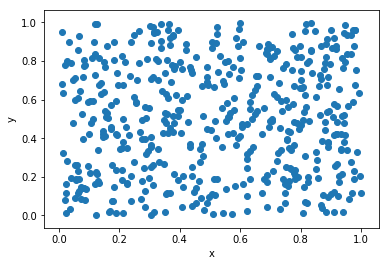

In [50]:
%matplotlib inline
import matplotlib.pyplot as plt

def rng(m=2**32, a=1103515245, c=12345):
    rng.current = (a*rng.current + c) % m
    return rng.current/m

# setting the seed
rng.current = 1

xy = [rng() for i in range(1000)]

plt.scatter(xy[0::2],xy[1::2])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Monte Carlo (trochę prościej)

Wartosc calki:  -327.9923458757961


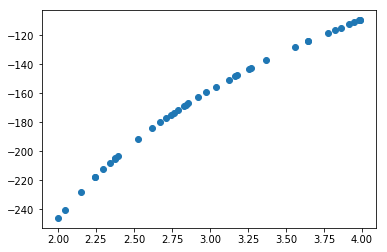

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

N = 40

#funkcja podcalkowa
f1 = lambda x: -2*x**4 + 5*x
#przedzialy calkowania
x0 = 0
x1 = 0.5

#funkcja podcalkowa
f2 = lambda x: 1/(np.sqrt(x**3 + 2.56))
#przedzialy calkowania
x0 = 2
x1 = 4

#funkcja podcalkowa
f3 = lambda x: np.sqrt(x)**7)
#przedzialy calkowania
x0 = 5
x1 = 10

#funkcja podcalkowa
f4 = lambda x: x**2 - 500/x
#przedzialy calkowania
x0 = 2
x1 = 4

#generator losowy prostokatow pod f(x)
xvals = x0 + (x1 - x0)*np.random.random(N)
fvals = f1(xvals) #f(x_i) tj. wysokosc kazdego prostokata
pole = fvals * (x1-x0)/N

calka = sum(pole)
print('Wartosc calki: ', calka)


